In [1]:
library(survminer)
library(survival)
library(forestplot)
library(ggsci)
library(mice)

Loading required package: ggplot2

Loading required package: ggpubr


Attaching package: ‘survival’


The following object is masked from ‘package:survminer’:

    myeloma


Loading required package: grid

Loading required package: checkmate

Warning message:
“package ‘checkmate’ was built under R version 4.3.2”
Loading required package: abind


Attaching package: ‘mice’


The following object is masked from ‘package:stats’:

    filter


The following objects are masked from ‘package:base’:

    cbind, rbind




### 1. Imputation with Continuous Variables
---

In [2]:
X <- read.table('data/processed/AL_for_ccp_02.tsv', sep='\t', header=T, row.names='Code.ID')

In [4]:
Ximp <- mice(data = X, m = 5, maxit = 100, seed = 500)


 iter imp variable
  1   1  Kappa_sFLC  Lambda_sFLC  kappa_lambda_ratio  dFLC  Bone_marrow_plasma_cells____  IVSd  LVEF  WBC  Hemoglobin  MCV  Platelet_count  Sed_rate  D_dimer  Factor_X  eGFR  X24_hr_UTP  Albumin  Alk_phos  BNP  Troponin  Calcium  Uric_acid  LDH  Iron  TIBC  Systolic_BP_sitting  Diastolic_BP_sitting  Pulse_sitting
  1   2  Kappa_sFLC  Lambda_sFLC  kappa_lambda_ratio  dFLC  Bone_marrow_plasma_cells____  IVSd  LVEF  WBC  Hemoglobin  MCV  Platelet_count  Sed_rate  D_dimer  Factor_X  eGFR  X24_hr_UTP  Albumin  Alk_phos  BNP  Troponin  Calcium  Uric_acid  LDH  Iron  TIBC  Systolic_BP_sitting  Diastolic_BP_sitting  Pulse_sitting
  1   3  Kappa_sFLC  Lambda_sFLC  kappa_lambda_ratio  dFLC  Bone_marrow_plasma_cells____  IVSd  LVEF  WBC  Hemoglobin  MCV  Platelet_count  Sed_rate  D_dimer  Factor_X  eGFR  X24_hr_UTP  Albumin  Alk_phos  BNP  Troponin  Calcium  Uric_acid  LDH  Iron  TIBC  Systolic_BP_sitting  Diastolic_BP_sitting  Pulse_sitting
  1   4  Kappa_sFLC  Lambda_sFLC  k

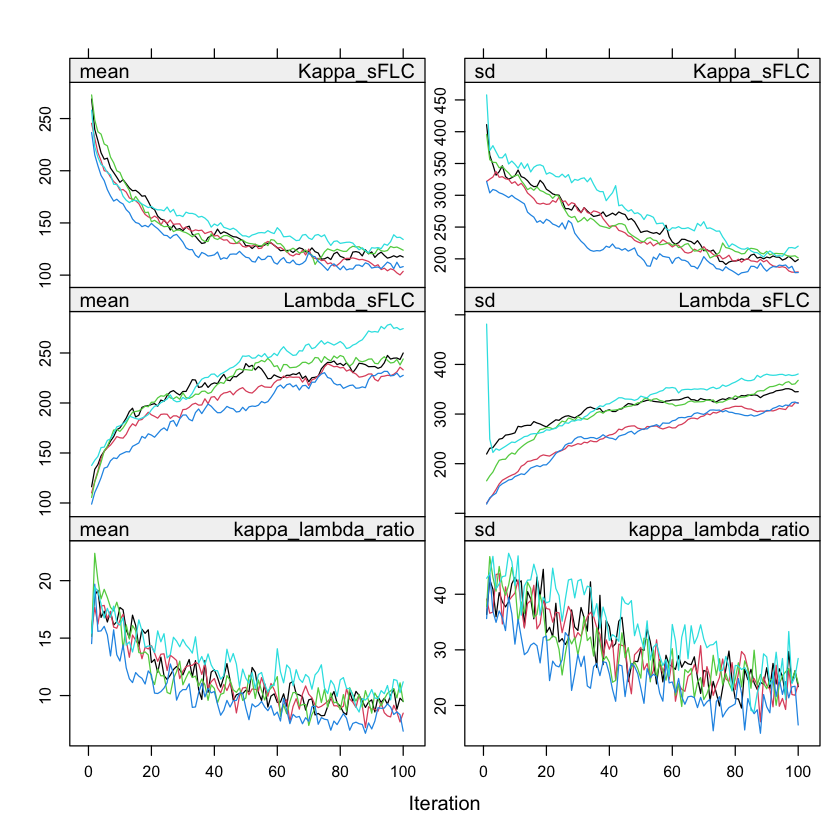

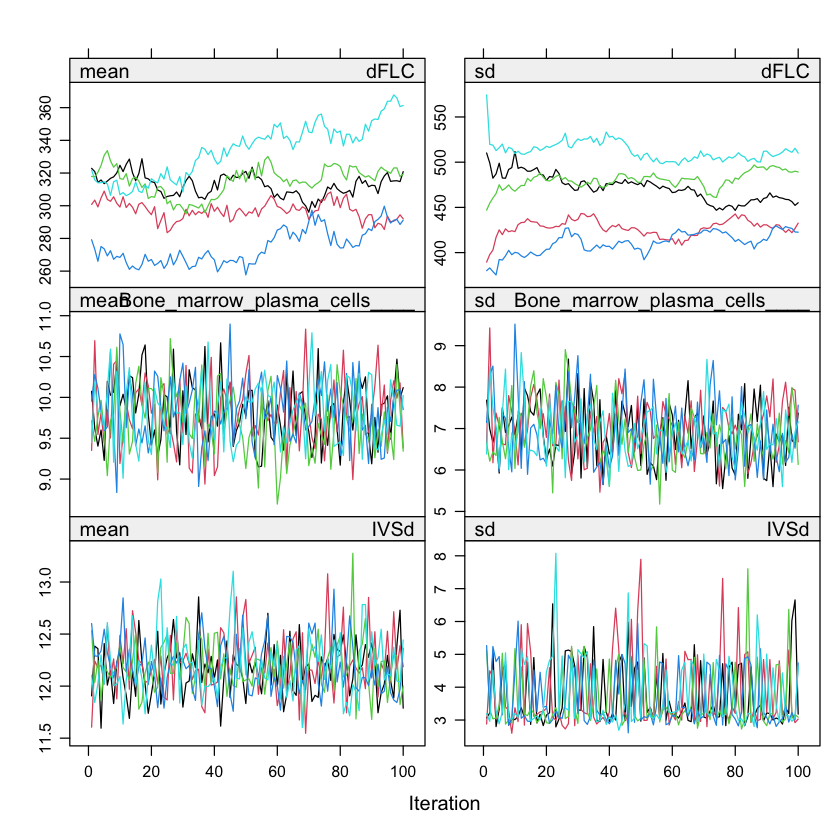

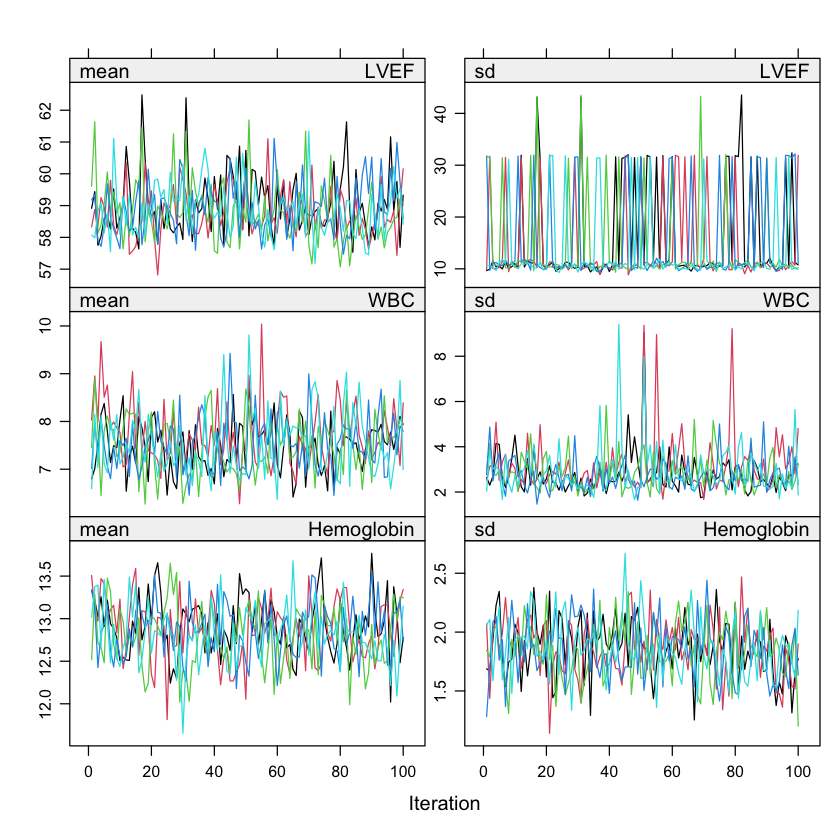

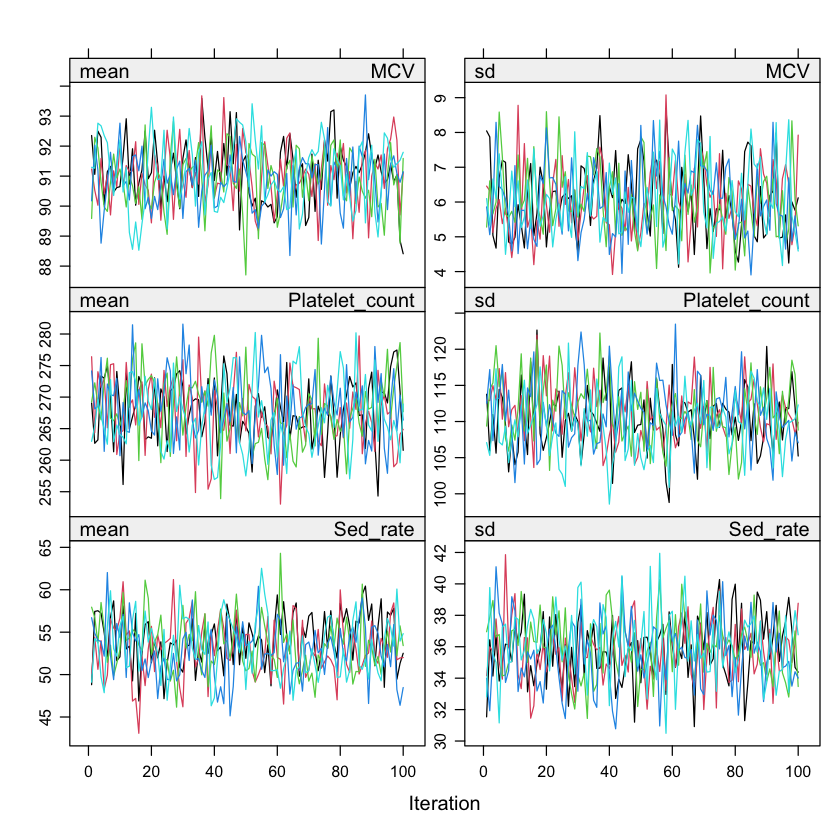

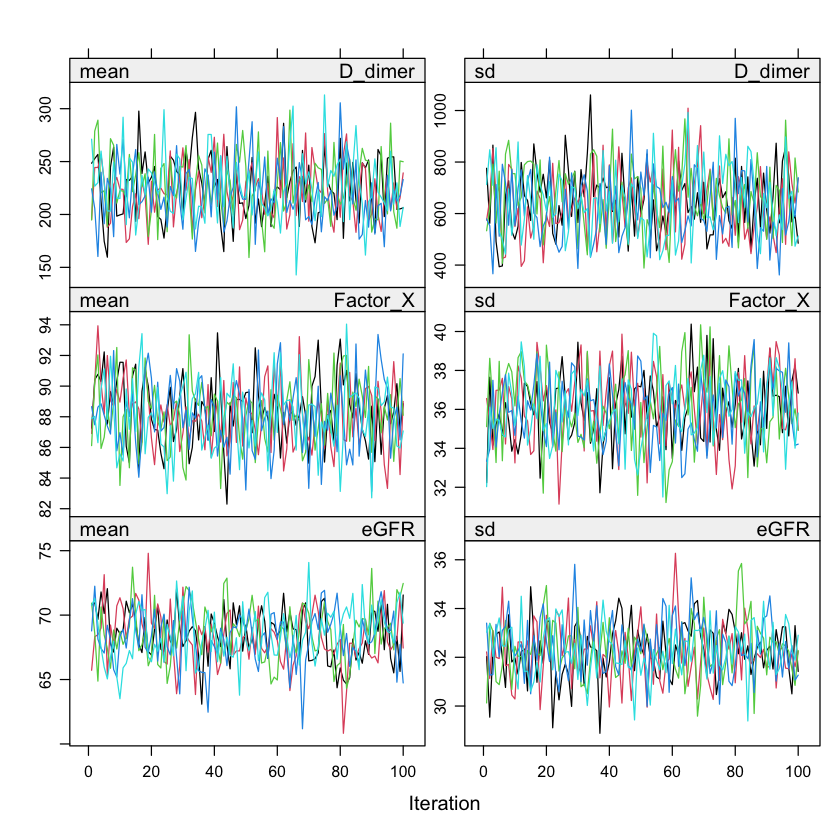

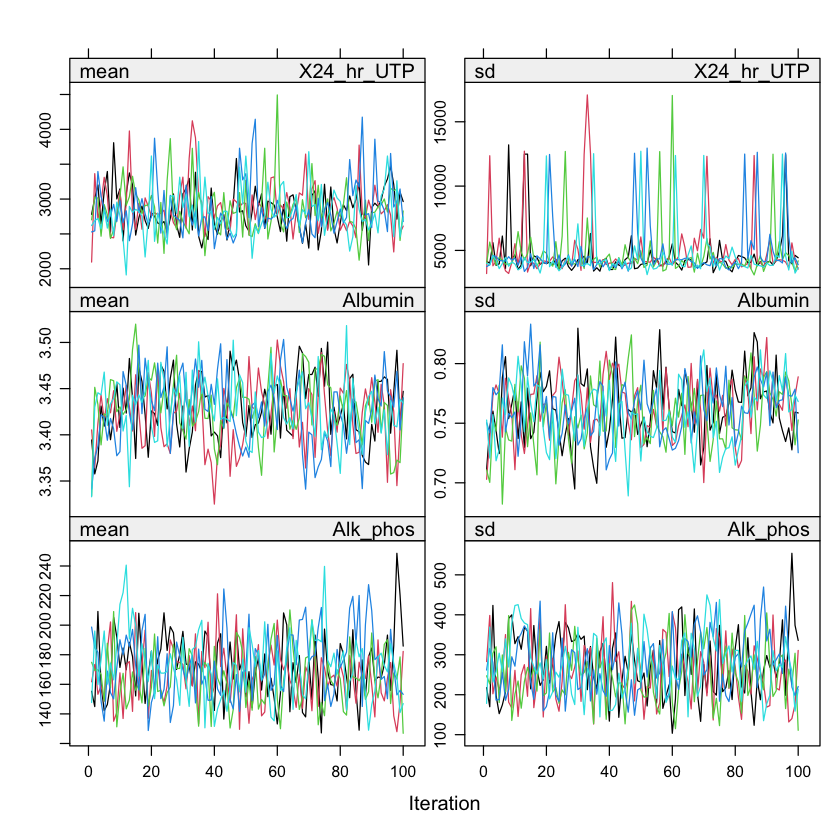

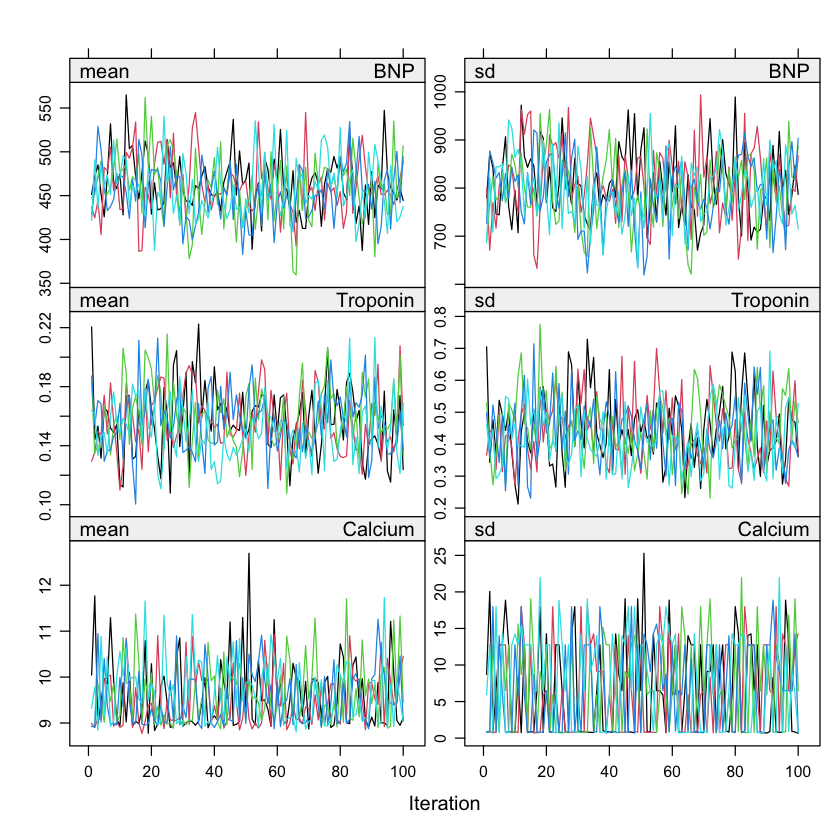

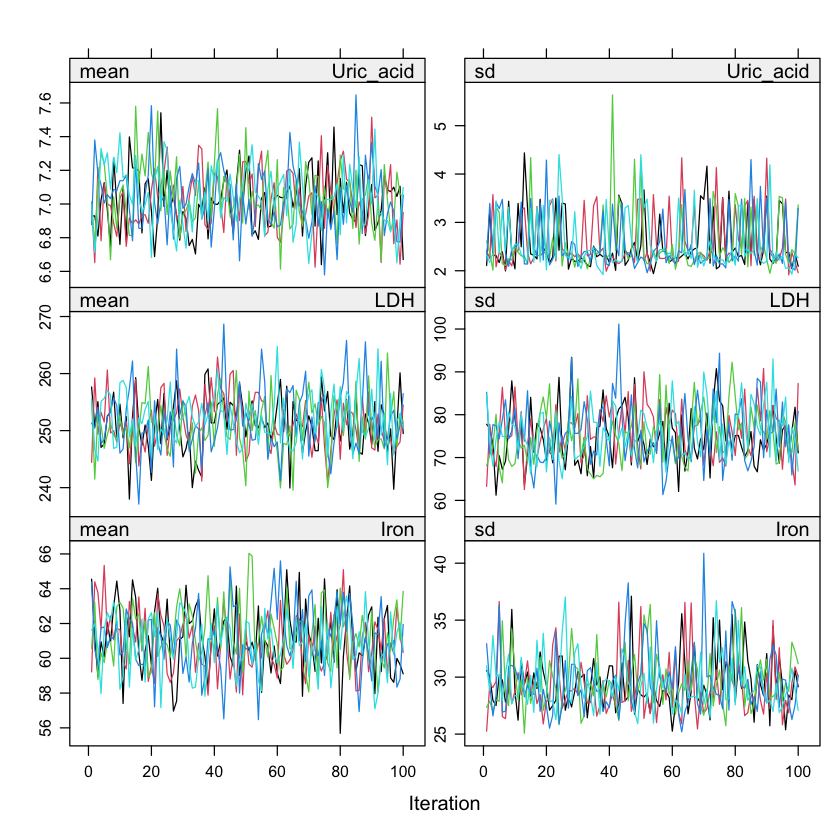

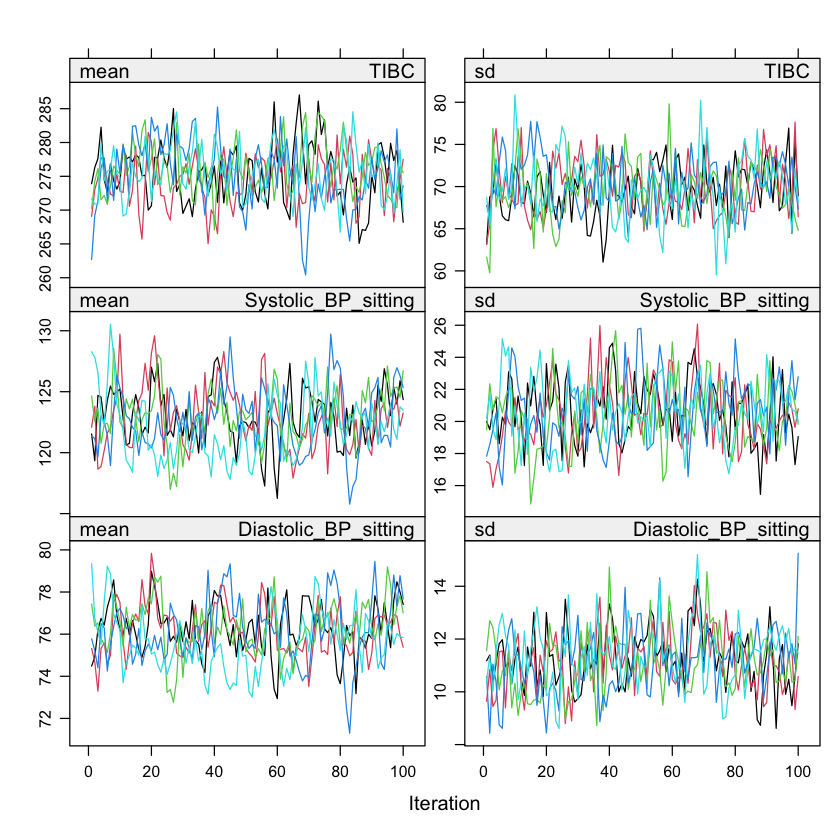

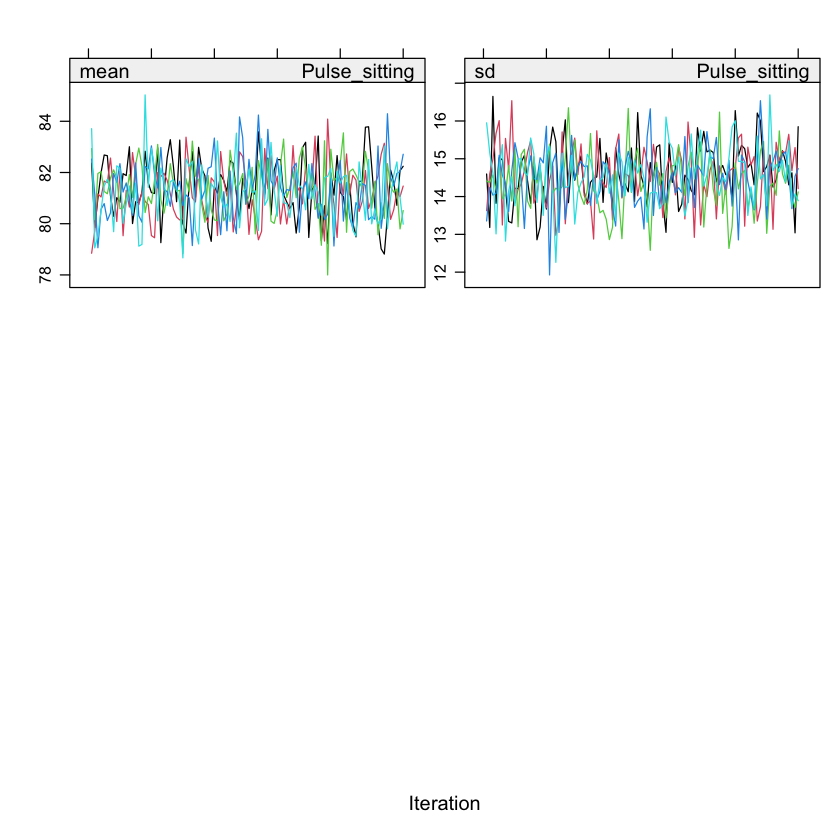

In [8]:
plot(Ximp)

In [6]:
# Save object
saveRDS(Ximp, file = "data/imputed/mice_qvars_01.rds")

# Create new dataframe
X.imputed <- complete(Ximp)
rownames(X.imputed) <- rownames(X)

# Write table
write.table(X.imputed, "data/imputed/mice_qvars_01.tsv", sep='\t')

### 2. Imputation with Continuous + Categorical Variables
---

* In progress

In [2]:
data.df <- read.table("data/processed/AL_for_imputation_01.tsv", sep="\t", header=T)
rownames(data.df) <- data.df$Code.ID
data.df$Code.ID <- NULL

In [12]:
data.df[sapply(data.df, is.character)] <- lapply(data.df[sapply(data.df, is.character)], as.factor)


In [ ]:
# Imputation with multivariable imputation by chained equations (MICE)
imp <- mice(data = data.df, m = 5, maxit = 100, seed = 500)

In [5]:
#saveRDS(imp, file = "data/imputed/dataset_mice_01.rds") 

In [ ]:
#plot(imp)

In [7]:
X <- complete(imp,1)
rownames(X) <- rownames(data.df)